# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Muhammad Farhan
- **Email:** muhammad.farhan916@ui.ac.id
- **ID Dicoding:** muhammad_farhan_2Vuo

## Menentukan Pertanyaan Bisnis

- Bagaimana permintaan penyewaan sepeda berubah di berbagai musim? Pada musim apa penyewaan sepeda paling banyak?
- Apa perbedaan perilaku antara pengguna biasa dan pengguna terdaftar? Apakah pengguna biasa lebih terpengaruh oleh hari libur atau akhir pekan?
- Bagaimana suhu (temp) atau suhu yang terasa (atemp) berkorelasi dengan jumlah total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Data Wrangling

### Gathering Data

In [262]:
dataset_path = '/content/drive/My Drive/bangkit/Bike-sharing-dataset/'
day_df = pd.read_csv(dataset_path + 'day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Data memiliki tanggal dan hari, berarti data merupakan time series data

### Assessing Data

In [263]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [264]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [265]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [266]:
day_df.duplicated().sum()

0

**Insight:**
Tidak ada missing value dan duplikasi data

### Cleaning Data

In [267]:
# Change the dteday column into datetime type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [268]:
# Create the new "yr_label"
yr_mapping = {0: '2011', 1: '2012'}
day_df['yr_label'] = day_df['yr'].map(yr_mapping)

# Create the new "mnth_label"
mnth_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['mnth_label'] = day_df['mnth'].map(mnth_mapping)

# Create the new "season_label"
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_mapping)

season_order = ['Spring', 'Summer', 'Fall', 'Winter']
day_df['season_label'] = pd.Categorical(day_df['season_label'], categories=season_order, ordered=True)

# Create the new "weekday_label"
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
day_df['weekday_label'] = day_df['weekday'].map(weekday_mapping)

weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_df['weekday_label'] = pd.Categorical(day_df['weekday_label'], categories=weekday_order, ordered=True)

day_df['temp_actual'] = day_df['temp'] * 41
day_df['atemp_actual'] = day_df['atemp'] * 50
day_df['hum_actual'] = day_df['hum'] * 100
day_df['windspeed_actual'] = day_df['windspeed'] * 67

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,yr_label,mnth_label,season_label,weekday_label,temp_actual,atemp_actual,hum_actual,windspeed_actual
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,2011,Jan,Spring,Saturday,14.110847,18.18125,80.5833,10.749882
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801,2011,Jan,Spring,Sunday,14.902598,17.68695,69.6087,16.652113
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,2011,Jan,Spring,Monday,8.050924,9.47025,43.7273,16.636703
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1454,1562,2011,Jan,Spring,Tuesday,8.200000,10.60610,59.0435,10.739832
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1518,1600,2011,Jan,Spring,Wednesday,9.305237,11.46350,43.6957,12.522300


**Insight:**
Beberapa kolom data perlu diberi label, seperti season, yr, mnth, dan weekday agar lebih mudah dipahami

## Exploratory Data Analysis (EDA)

In [269]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,yr_label,mnth_label,season_label,weekday_label,temp_actual,atemp_actual,hum_actual,windspeed_actual
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,12,4,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2012,Jan,Fall,Sunday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,366,62,188,105,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,...,3656.172367,4504.348837,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,20.000000,22.000000,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,...,2497.000000,3152.000000,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,...,3662.000000,4548.000000,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,...,4776.500000,5956.000000,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6946.000000,8714.000000,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021


In [270]:
# Sum casual and registered rentals by weekday.
weekday_groupby = day_df.groupby('weekday_label',  observed=False)[['casual', 'registered']].sum()
print(weekday_groupby)

               casual  registered
weekday_label                    
Sunday         140521      303506
Monday          70784      384719
Tuesday         57843      411266
Wednesday       57319      415729
Thursday        61460      423935
Friday          78238      409552
Saturday       153852      323955


In [271]:
# Sum casual and registered rentals by season.
season_groupby = day_df.groupby('season_label', observed=False)[['casual', 'registered']].sum()
print(season_groupby)

              casual  registered
season_label                    
Spring         60622      410726
Summer        203522      715067
Fall          226091      835038
Winter        129782      711831


**Insight:**
Terdapat perbedaan signifikan jumlah permintaan Bikesharing pada hari dan musim yang berbeda

## Visualization & Explanatory Analysis

### Pada musim apa penyewaan sepeda paling banyak?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


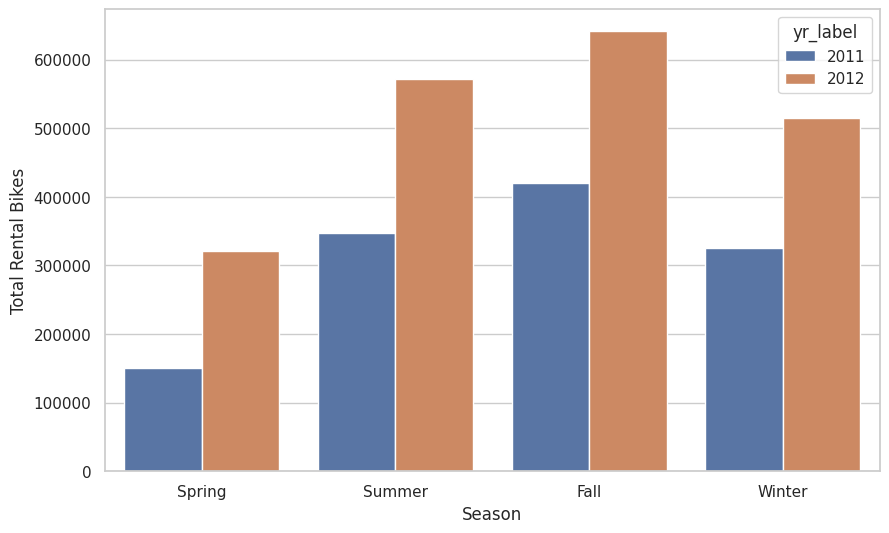

In [272]:
# Group data by season and year, summing the count of rentals.
aggregated_season_df = day_df.groupby(['season_label', 'yr_label'], as_index=False, observed=False)['cnt'].sum()

# Create a bar plot for total rentals by season, colored by year.
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_season_df, x="season_label", y="cnt", hue="yr_label", errorbar=None)
plt.xlabel("Season")
plt.ylabel("Total Rental Bikes")

plt.show()


**Insight:**
Permintaan tertinggi Bikesharing terjadi pada musim gugur (fall) untuk tahun 2011 dan 2012

### Apa perbedaan perilaku antara pengguna biasa dan pengguna terdaftar? Apakah pengguna biasa lebih terpengaruh oleh hari libur atau akhir pekan?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


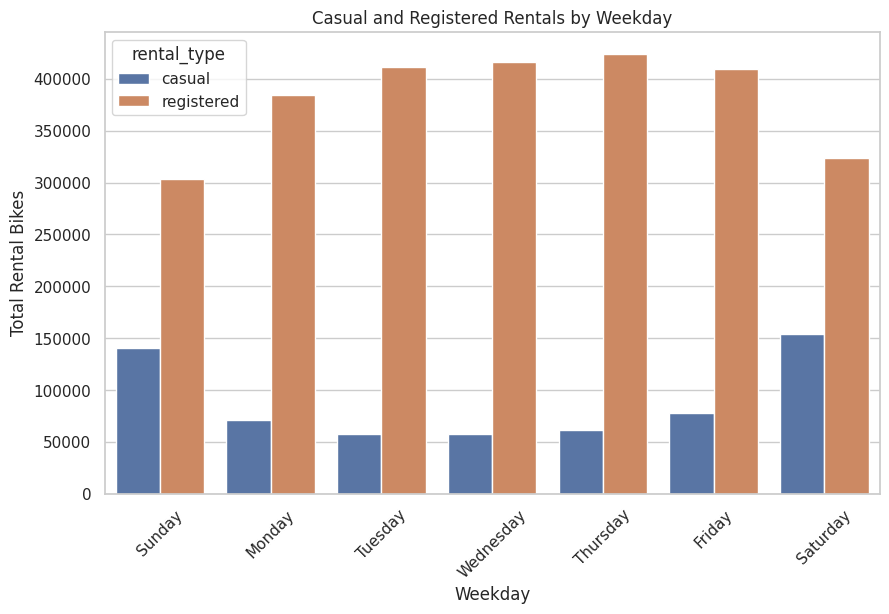

In [273]:
# Group data by weekday and sum casual and registered rentals.
weekday_long_df = day_df.groupby('weekday_label', as_index=False, observed=False)[['casual', 'registered']].sum()
weekday_long_df = weekday_long_df.melt(id_vars='weekday_label', var_name='rental_type', value_name='count')

# Create a bar plot for rentals by weekday.
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_long_df, x="weekday_label", y="count", hue="rental_type", errorbar=None)

plt.xlabel("Weekday")
plt.ylabel("Total Rental Bikes")
plt.title("Casual and Registered Rentals by Weekday")
plt.xticks(rotation=45)

plt.show()


**Insight:**
Untuk pengguna casual, weekend (Saturday & Sunday merupakan hari dengan jumlah rental sepeda tertinggi. Berbanding terbalik dengan pengguna registered, weekend merupakan hari dengan jumlah rental sepeda terendah

### Bagaimana suhu (temp) atau suhu yang terasa (atemp) berkorelasi dengan jumlah total penyewaan sepeda (cnt)?

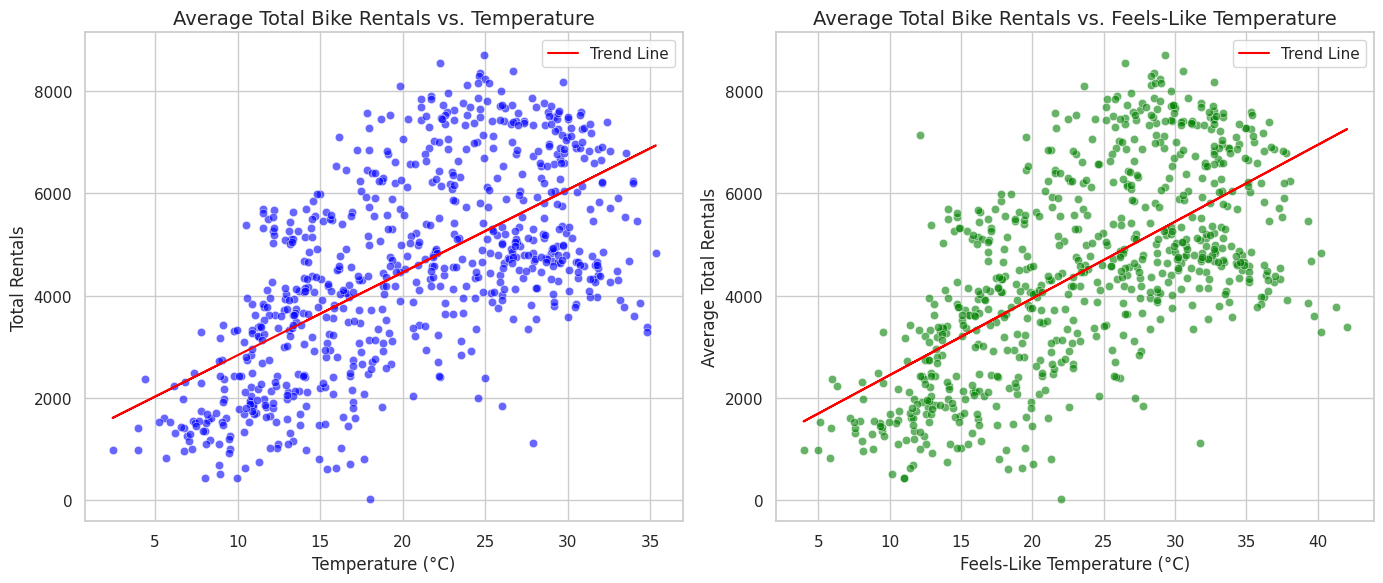

In [274]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for temp vs. total rentals (cnt)
sns.scatterplot(data=day_df, x='temp_actual', y='cnt', ax=axs[0], color='blue', alpha=0.6)
axs[0].set_title('Average Total Bike Rentals vs. Temperature', fontsize=14)
axs[0].set_xlabel('Temperature (°C)', fontsize=12)
axs[0].set_ylabel('Total Rentals', fontsize=12)

# Add a regression line
slope, intercept, r_value, p_value, std_err = linregress(day_df['temp_actual'], day_df['cnt'])
axs[0].plot(day_df['temp_actual'], slope * day_df['temp_actual'] + intercept, color='red', label='Trend Line')
axs[0].legend()

# Scatter plot for atemp vs. total rentals (cnt)
sns.scatterplot(data=day_df, x='atemp_actual', y='cnt', ax=axs[1], color='green', alpha=0.6)
axs[1].set_title('Average Total Bike Rentals vs. Feels-Like Temperature', fontsize=14)
axs[1].set_xlabel('Feels-Like Temperature (°C)', fontsize=12)
axs[1].set_ylabel('Average Total Rentals', fontsize=12)

# Add a regression line
slope, intercept, r_value, p_value, std_err = linregress(day_df['atemp_actual'], day_df['cnt'])
axs[1].plot(day_df['atemp_actual'], slope * day_df['atemp_actual'] + intercept, color='red', label='Trend Line')
axs[1].legend()

plt.tight_layout()
plt.show()


**Insight:**
- Terdapat korelasi antara permintaan Bikesharing dan suhu, di mana semakin tinggi suhu, semakin banyak permintaan Bikesharing.
- Permintaan tertinggi terjadi pada suhu sekitar 20-30 dan suhu terasa sekitar 25-35

In [275]:
# Save modified csv to main_data.csv
day_df.to_csv("main_data.csv", index=False)

## Conclusion

- Musim gugur merupakan musim dengan permintaan Bikesharing tertinggi. Hal ini bisa jadi disebabkan oleh musim gugur yang memiliki suhu yang lebih sejuk dan nyaman sehingga membuat berkendara sepeda lebih menyenangkan dibandingkan dengan musim panas yang panas atau musim dingin yang dingin.

- Permintaan Bikesharing pada weekend oleh Pengguna casual cenderung lebih tinggi karena pengguna casual ingin menggunakan waktu luang untuk bersepeda. Mereka mungkin ingin bersepeda untuk bersenang-senang, rekreasi, atau menjelajahi area baru.
Permintaan Bikesharing pada weekend oleh Pengguna terdaftar cenderung lebih rendah karena pengguna terdaftar menggunakan layanan bikesharing untuk keperluan sehari-hari seperti pergi bekerja atau beraktivitas rutin. Pada akhir pekan, mereka mungkin tidak perlu menggunakan sepeda sebanyak saat hari kerja.

- Suhu antara 20-30°C dianggap nyaman untuk bersepeda. Dalam rentang suhu ini, banyak orang merasa lebih segar dan tidak terlalu panas, sehingga meningkatkan kemungkinan mereka untuk menggunakan sepeda.